<a href="https://colab.research.google.com/github/Vasantha-Meghana/Predictive_Analytics_Projects/blob/Credit_Card_Fraud_Detection/predictive2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9983837600206878
ROC AUC Score: 0.9585138315653033

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15430
         1.0       0.71      0.58      0.64        38

    accuracy                           1.00     15468
   macro avg       0.85      0.79      0.82     15468
weighted avg       1.00      1.00      1.00     15468



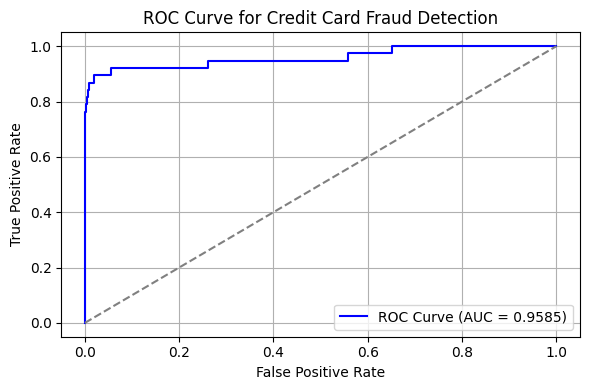

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Drop missing values
df = df.dropna(subset=['Class'])
df = df.dropna()

# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.4f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Fraud Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()